In [50]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Eth per gas (gwei * 1e-09)
gas_fee_eth = 70 * 1e-09

In [66]:
# Contract Params
gas_base = 30948
gas_per_better = 3149
roll_timer_seconds = 45
max_bets = 128

rolls_per_hour = (roll_timer_seconds / 60) * 60

place_bet_cost = np.cumsum(np.random.randint(55868, 90069, size=max_bets))

space_x = np.arange(max_bets)
space_y_play = ((space_x * gas_per_better + 30948) * gas_fee_eth)  * rolls_per_hour
space_y_placebet = (place_bet_cost * gas_fee_eth) * rolls_per_hour

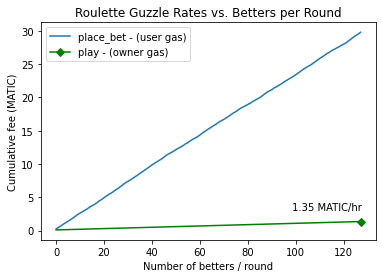

In [108]:
plt.plot(space_x, space_y_placebet, label='place_bet - (user gas)')
plt.plot(space_x, space_y_play, '-gD', markevery=[127], label='play - (owner gas)')

plt.annotate(str(space_y_play[-1])[0:4] + ' MATIC/hr', (max_bets * 0.77,3))
plt.xlabel("Number of betters / round")
plt.ylabel("Cumulative fee (MATIC)")
plt.title('Roulette Guzzle Rates vs. Betters per Round')
plt.legend()

In [101]:
games_per_hour = 1 * 60 * 60
matic_to_link = 0.09541955
link_cost = 0.0001 * (1 / matic_to_link)

games_x = np.arange(games_per_hour)
link_cost = np.cumsum(np.zeros(games_per_hour) + link_cost)
game_cost = np.cumsum(np.random.randint(178286, 212486, size=games_per_hour), dtype=np.int64)

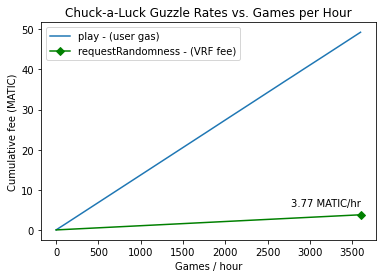

In [109]:
plt.plot(games_x, game_cost * gas_fee_eth, label='play - (user gas)')
plt.plot(games_x, link_cost, '-gD', markevery=[games_per_hour - 1], label='requestRandomness - (VRF fee)')
plt.annotate(str(link_cost[-1])[0:4] + ' MATIC/hr', (games_per_hour * 0.77, 6))

plt.xlabel("Games / hour")
plt.ylabel("Cumulative fee (MATIC)")
plt.title('Chuck-a-Luck Guzzle Rates vs. Games per Hour')
plt.legend()